<div style="text-align: center;">
  <h1 style="font-size: 8rem; color: black;">World Air Quality Index</h1>
</div>

<img src="https://healthpolicy-watch.news/wp-content/uploads/2023/03/Screenshot-2023-03-15-at-14.50.42.png" style="width:900px; height:500px;">


Source: https://healthpolicy-watch.news/

In [1]:
import pandas as pd  
import matplotlib.pyplot as plt  
import seaborn as sns 
import numpy as np  

## About Dataset   
 
>**Sulfur Dioxide (SO2):** SO2 is a gas produced by the burning of fossil fuels, particularly in industrial processes. It can have harmful effects on human health, leading to respiratory issues and exacerbating asthma and other respiratory conditions.

>**Nitrogen Dioxide (NO2):** NO2 is a gas produced by the burning of fossil fuels, primarily in vehicles and power plants. Exposure to high levels of NO2 can irritate the respiratory system and contribute to the development of respiratory conditions.

>**Air Quality Index (AQI):** AQI is a measure used to communicate the level of air pollution in a specific area. It is often calculated based on the concentrations of various pollutants, such as PM2.5, ozone, CO, SO2, and NO2. The AQI provides a standardized scale to help individuals understand the air quality and take necessary precautions to protect their health.

>**Good:** The "Good" category on the AQI scale indicates that the air quality is satisfactory, and there is little to no health risk associated with it.

>**Moderate:** The "Moderate" category signifies that the air quality is acceptable, but there may be a moderate health concern for a small number of individuals, particularly those who are unusually sensitive to air pollution.

>**Unhealthy for Sensitive Groups:** This category indicates that the air quality is of concern for individuals who are more vulnerable to the effects of air pollution, such as children, older adults, and people with respiratory or cardiovascular conditions.

>**Unhealthy:** The "Unhealthy" category suggests that the general population may start to experience health effects due to the poor air quality. It is advisable to limit outdoor activities and take necessary precautions.

>**Very Unhealthy:** The "Very Unhealthy" category signifies a significant health risk from the air pollution. It is recommended to avoid outdoor activities and minimize exposure to the polluted air.

>**Hazardous:** The "Hazardous" category indicates the highest level of air pollution, posing a severe health risk. It is crucial to stay indoors, use air filtration systems, and follow local authorities' guidance to protect health.

# PART 1
### Chosen Dataset: World Air Quality Index

## Backround

The aim of this dataset is to offer valuable insights into the air quality of various regions, enabling researchers and policymakers to make well-informed decisions regarding the issue of air pollution. It is a combination of two distinct datasets—one with details about cities and their latitude and longitude coordinates, and the other containing air pollution data from countries worldwide. This merging allows for the analysis and comparison of air quality indices across different cities in various countries.

The inspiration behind creating this dataset arose from the escalating concern surrounding the impact of air pollution on both human health and the environment. By ensuring easy access to and comprehension of this data, the hope is to contribute to the ongoing efforts to enhance air quality and establish a cleaner, healthier world for generations to come.

## Explanation of common AQI terms

**PM2.5:** PM2.5 refers to tiny particles or droplets in the air that are 2.5 micrometers or less in width. They can be harmful to human health when inhaled, especially in high concentrations.

**Ozone:** Ozone is a gas that can form in the atmosphere through a chemical reaction between sunlight and other pollutants. High levels of ozone can be harmful to human health, particularly for those with respiratory issues.

**Carbon Monoxide (CO):** CO is a colorless, odorless gas that is produced by the incomplete burning of fossil fuels. High levels of CO can be toxic to humans and can cause headaches, dizziness, and nausea

In [2]:
aqi_df = pd.read_csv('AQI.csv')  

display(aqi_df.head())
display(aqi_df.describe())
display(aqi_df.describe(include=['O']))
aqi_df.info()

,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category,lat,lng
0,Russian Federation,Praskoveya,51,Moderate,1,Good,36,Good,0,Good,51,Moderate,44.7444,44.2031
1,Brazil,Presidente Dutra,41,Good,1,Good,5,Good,1,Good,41,Good,-5.2900,-44.4900
2,Brazil,Presidente Dutra,41,Good,1,Good,5,Good,1,Good,41,Good,-11.2958,-41.9869
3,Italy,Priolo Gargallo,66,Moderate,1,Good,39,Good,2,Good,66,Moderate,37.1667,15.1833
4,Poland,Przasnysz,34,Good,1,Good,34,Good,0,Good,20,Good,53.0167,20.8833


,AQI Value,CO AQI Value,Ozone AQI Value,NO2 AQI Value,PM2.5 AQI Value,lat,lng
count,16695.000000,16695.000000,16695.000000,16695.000000,16695.000000,16695.000000,16695.000000
mean,62.998682,1.342138,31.767355,3.819647,59.821324,30.267148,-3.944485
std,43.091971,2.371379,22.839343,5.880677,43.208298,22.947398,73.037148
min,7.000000,0.000000,0.000000,0.000000,0.000000,-54.801900,-171.750000
25%,38.500000,1.000000,20.000000,0.000000,34.000000,16.515450,-75.180000
50%,52.000000,1.000000,29.000000,2.000000,52.000000,38.815800,5.643100
75%,69.000000,1.000000,38.000000,5.000000,69.000000,46.683300,36.275000
max,500.000000,133.000000,222.000000,91.000000,500.000000,70.767000,178.017800


,Country,City,AQI Category,CO AQI Category,Ozone AQI Category,NO2 AQI Category,PM2.5 AQI Category
count,16393,16695,16695,16695,16695,16695,16695
unique,174,14229,6,3,5,2,6
top,United States of America,Santa Cruz,Good,Good,Good,Good,Good
freq,3954,17,7708,16691,15529,16684,7936


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16695 entries, 0 to 16694
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country             16393 non-null  object 
 1   City                16695 non-null  object 
 2   AQI Value           16695 non-null  int64  
 3   AQI Category        16695 non-null  object 
 4   CO AQI Value        16695 non-null  int64  
 5   CO AQI Category     16695 non-null  object 
 6   Ozone AQI Value     16695 non-null  int64  
 7   Ozone AQI Category  16695 non-null  object 
 8   NO2 AQI Value       16695 non-null  int64  
 9   NO2 AQI Category    16695 non-null  object 
 10  PM2.5 AQI Value     16695 non-null  int64  
 11  PM2.5 AQI Category  16695 non-null  object 
 12  lat                 16695 non-null  float64
 13  lng                 16695 non-null  float64
dtypes: float64(2), int64(5), object(7)
memory usage: 1.8+ MB


- Our sample includes 16695 records and has 14 features
- There are 7 numeric variables and 7 categorical variables. 
- In our data, we have 5 pairs of numerical variables that are correlated with a categorical variable. For example, the *AQI Value* represents the level at which the corresponding *AQI Category* is shown. <br>
In addition, the *latitude* and *longitude* coordinates are also numerical variable, but they represent the location of a *City*, which is also a categorical variable. 
- We can see that only the column *Country* has missing values.

# PART 2: Exploratory data analysis

# 1)

In [3]:
aqi_df.isnull().sum()

Country               302
City                    0
AQI Value               0
AQI Category            0
CO AQI Value            0
CO AQI Category         0
Ozone AQI Value         0
Ozone AQI Category      0
NO2 AQI Value           0
NO2 AQI Category        0
PM2.5 AQI Value         0
PM2.5 AQI Category      0
lat                     0
lng                     0
dtype: int64

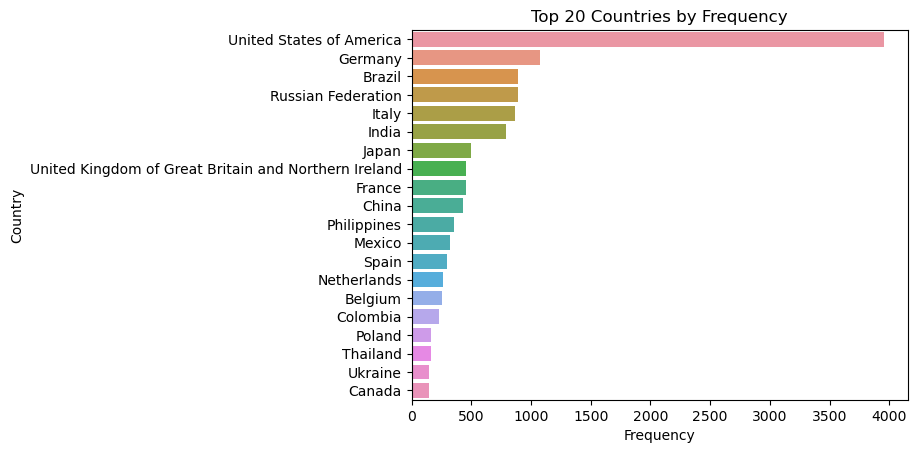

In [4]:
country_counts = aqi_df['Country'].value_counts()

top_20_countries = country_counts.head(20)

sns.barplot(x=top_20_countries, y=top_20_countries.index)
plt.title('Top 20 Countries by Frequency')
plt.xlabel('Frequency')
plt.ylabel('Country')
plt.show()

In the CSV file there are 174 unique countries, of which we looked at the top 20 most frequent coutries, because it's not possible to show the ditribution of all countries together. We can also witness that most of records came from the USA.

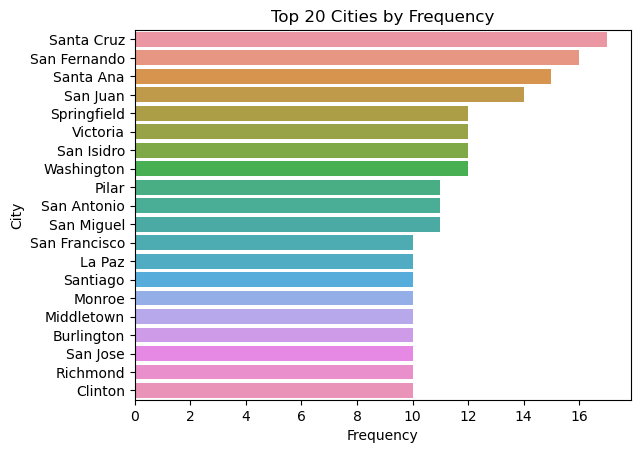

In [5]:
city_counts = aqi_df['City'].value_counts()

top_20_city = city_counts.head(20)

sns.barplot(x=top_20_city, y=top_20_city.index)
plt.title('Top 20 Cities by Frequency')
plt.xlabel('Frequency')
plt.ylabel('City')
plt.show()

In the CSV there are 14429 unique cities, of which we looked at the top 20 most frequent cities, because it's not possible to show the ditribution of all countries together.

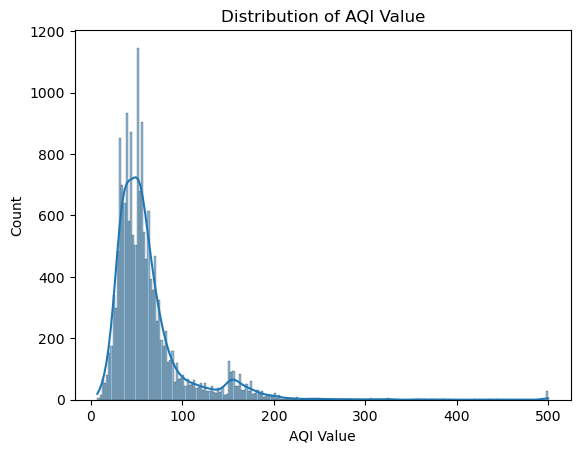

In [6]:
sns.histplot(aqi_df['AQI Value'], kde=True)
plt.title('Distribution of AQI Value')
plt.xlabel('AQI Value')
plt.show() 

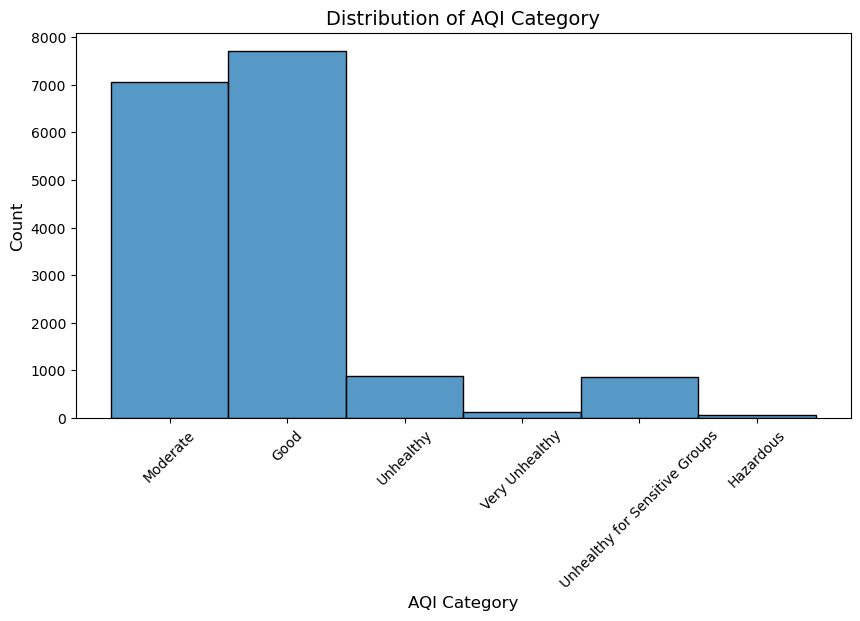

In [7]:
plt.figure(figsize=(10, 5))
sns.histplot(aqi_df['AQI Category'])
plt.title('Distribution of AQI Category', fontsize=14) 
plt.xlabel('AQI Category', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation = 45)
plt.show()

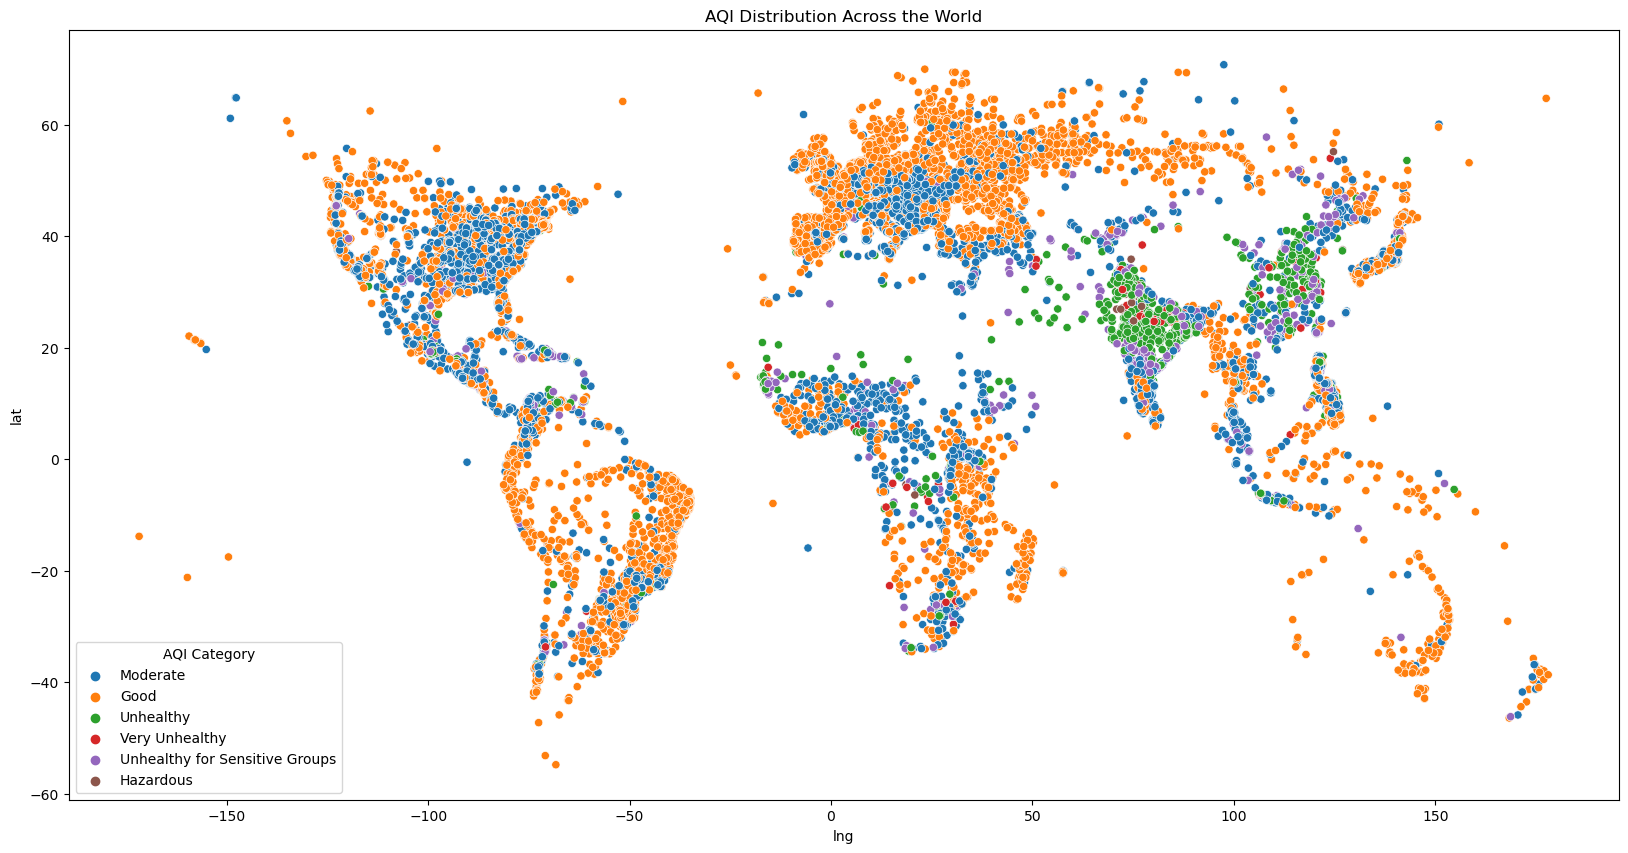

In [8]:
# region wise AQI distribution
plt.figure(figsize=(20,10))
sns.scatterplot(data=aqi_df,x='lng',y='lat',hue='AQI Category')
plt.title('AQI Distribution Across the World')
plt.show()

We can see that there are a lot of cities that have AQI rates labaled as "Unhealthy", concentrated mainly in India and the eastern parts of china.

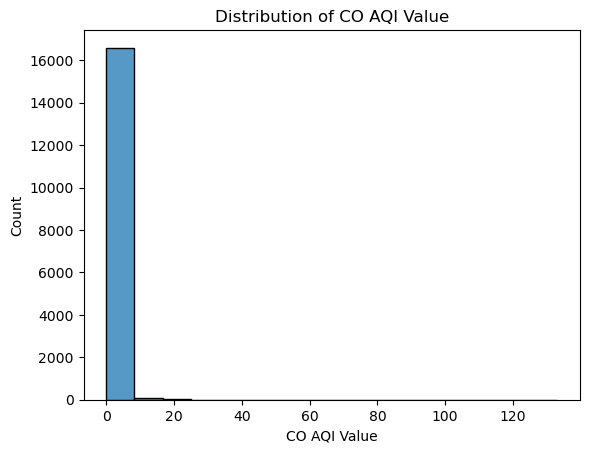

In [9]:
sns.histplot(aqi_df['CO AQI Value'])
plt.title('Distribution of CO AQI Value')
plt.xlabel('CO AQI Value')
plt.show() 

We can see that most of the CO AQI values are below 20.

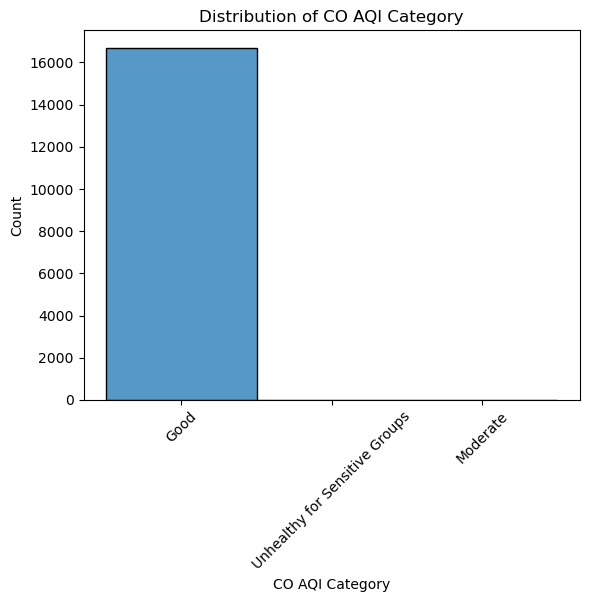

In [10]:
sns.histplot(aqi_df['CO AQI Category'])
plt.title('Distribution of CO AQI Category') 
plt.xlabel('CO AQI Category')
plt.ylabel('Count')
plt.xticks(rotation = 45)
plt.show()

In accordance with what we observed from the CO AQI value, the CO AQI Category will be labeled as 'Good' if the CO AQI value is below 50. With the exception of 4 records, all others in the CSV were categorized as 'Good'.

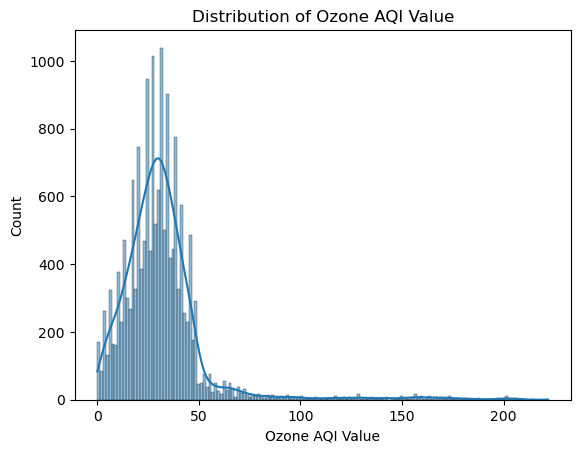

In [11]:
sns.histplot(aqi_df['Ozone AQI Value'], kde=True)
plt.title('Distribution of Ozone AQI Value')
plt.xlabel('Ozone AQI Value')
plt.show()

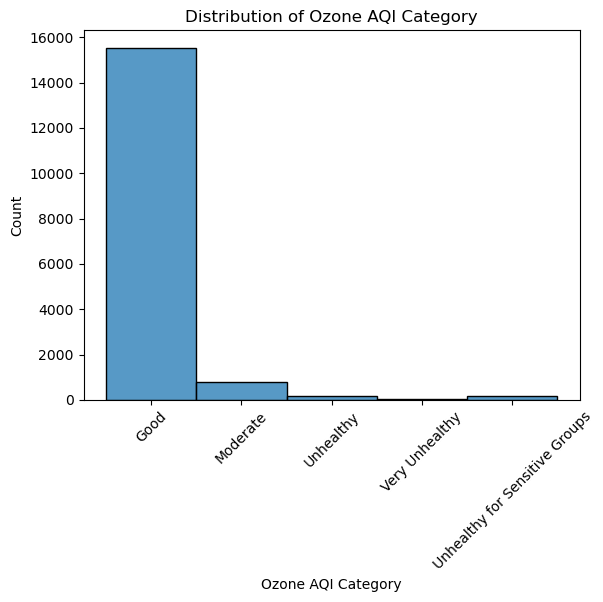

In [12]:
sns.histplot(aqi_df['Ozone AQI Category'])
plt.title('Distribution of Ozone AQI Category') 
plt.xlabel('Ozone AQI Category')
plt.ylabel('Count')
plt.xticks(rotation = 45)
plt.show()

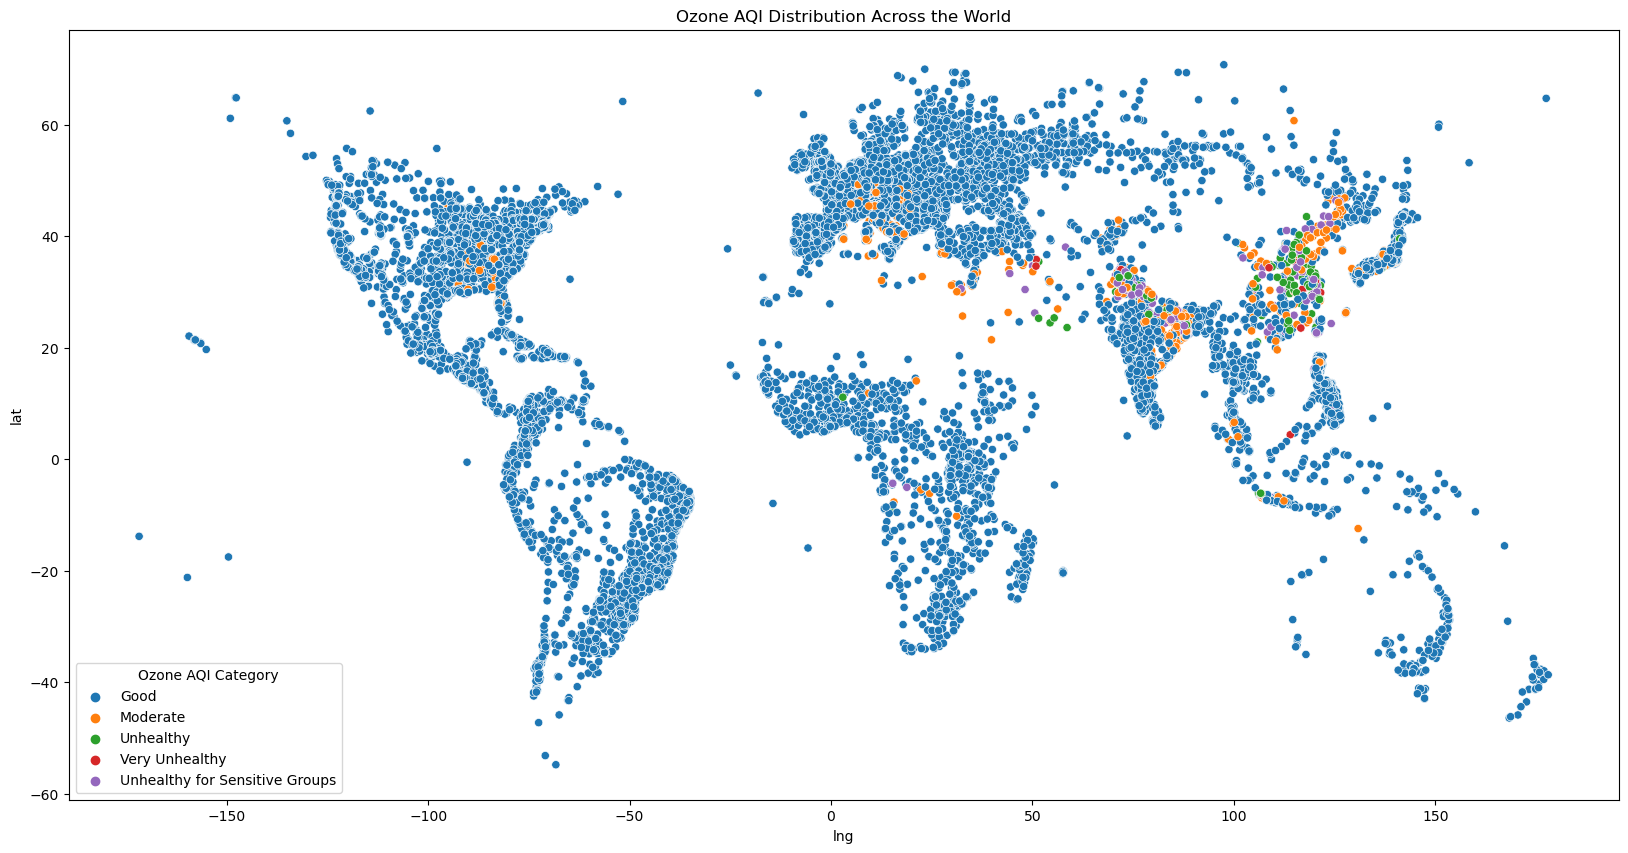

In [13]:
# region wise Ozone AQI distribution
plt.figure(figsize=(20,10))
sns.scatterplot(data=aqi_df,x='lng',y='lat',hue='Ozone AQI Category')
plt.title('Ozone AQI Distribution Across the World')
plt.show()

We can observe that ozone levels measured worldwide were predominantly labeled as 'Good,' with exceptions in small areas in eastern USA and central Europe. Significantly higher instances of 'Moderate' and 'Unhealthy' ozone measurements appear in eastern China and the northern and eastern parts of India.

In [14]:
most_frequent_countries = aqi_df.groupby('Ozone AQI Category')['Country'].agg(lambda x: x.value_counts().idxmax())
most_frequent_countries

Ozone AQI Category
Good                              United States of America
Moderate                                             Italy
Unhealthy                                            China
Unhealthy for Sensitive Groups                       China
Very Unhealthy                                       China
Name: Country, dtype: object

**What's interesting to see is:**
- Most frequent country with 'Good' Ozone AQI Category is USA.
- Most frequent country with 'moderate' Ozone AQI Category is Italy. 
- Most frequent country with 'unhealthy' Ozone AQI Category is China. 
- Most frequent country with 'unhealthy for sensitive groups' Ozone AQI Category is China. 
- The **ONLY** coutry with 'very unhealthy' Ozone AQI Category is China. 

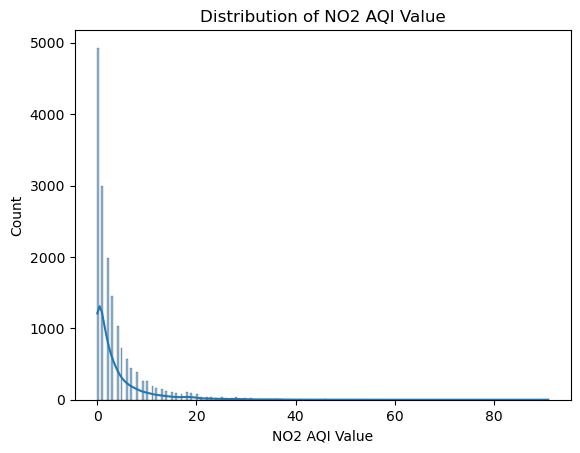

In [15]:
sns.histplot(aqi_df['NO2 AQI Value'], kde=True)
plt.title('Distribution of NO2 AQI Value')
plt.xlabel('NO2 AQI Value')
plt.show()

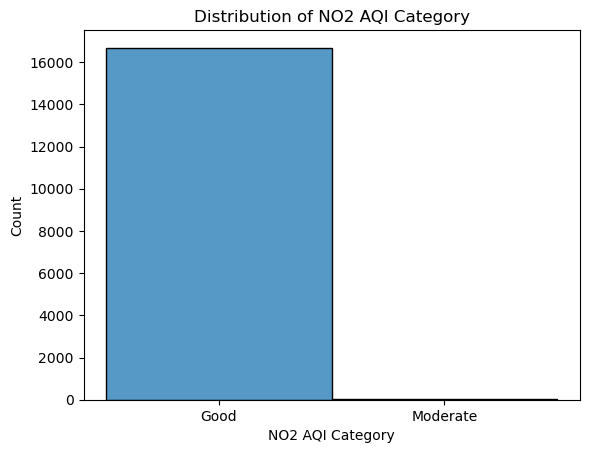

In [16]:
sns.histplot(aqi_df['NO2 AQI Category'])
plt.title('Distribution of NO2 AQI Category') 
plt.xlabel('NO2 AQI Category')
plt.ylabel('Count')
plt.show()

What's interesting to mention is that except for 11 records, all other records in that category were categorized as 'Good'.

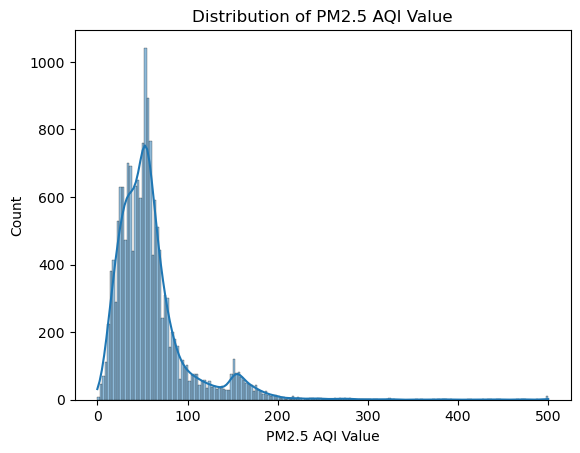

In [17]:
sns.histplot(aqi_df['PM2.5 AQI Value'], kde=True)
plt.title('Distribution of PM2.5 AQI Value')
plt.xlabel('PM2.5 AQI Value')
plt.show()

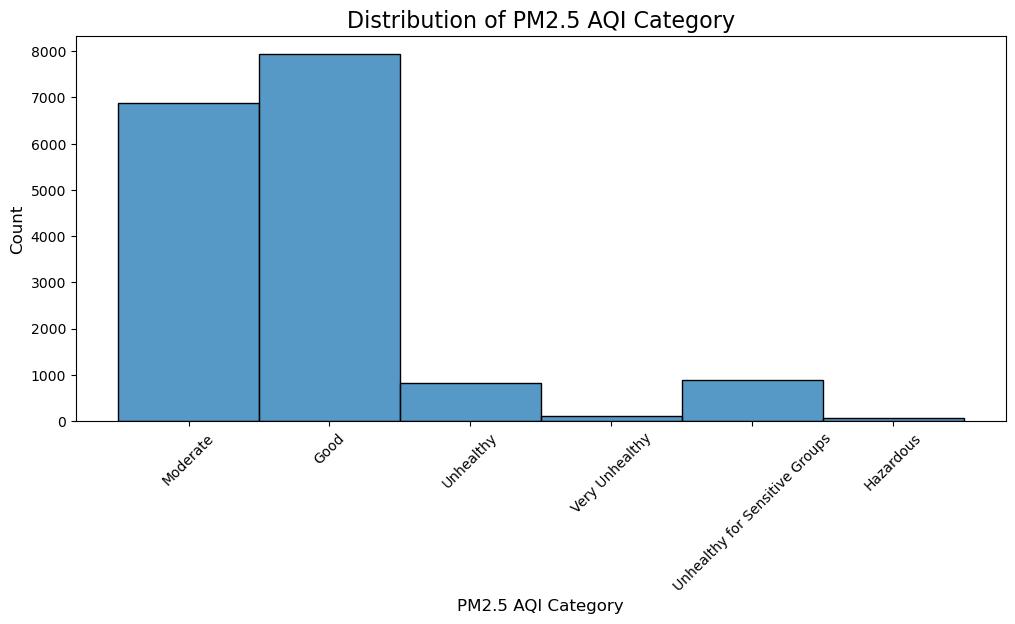

In [18]:
plt.figure(figsize=(12, 5))
sns.histplot(aqi_df['PM2.5 AQI Category'])
plt.title('Distribution of PM2.5 AQI Category', fontsize=16)  
plt.xlabel('PM2.5 AQI Category', fontsize=12) 
plt.ylabel('Count', fontsize=12) 
plt.xticks(rotation = 45)
plt.show()

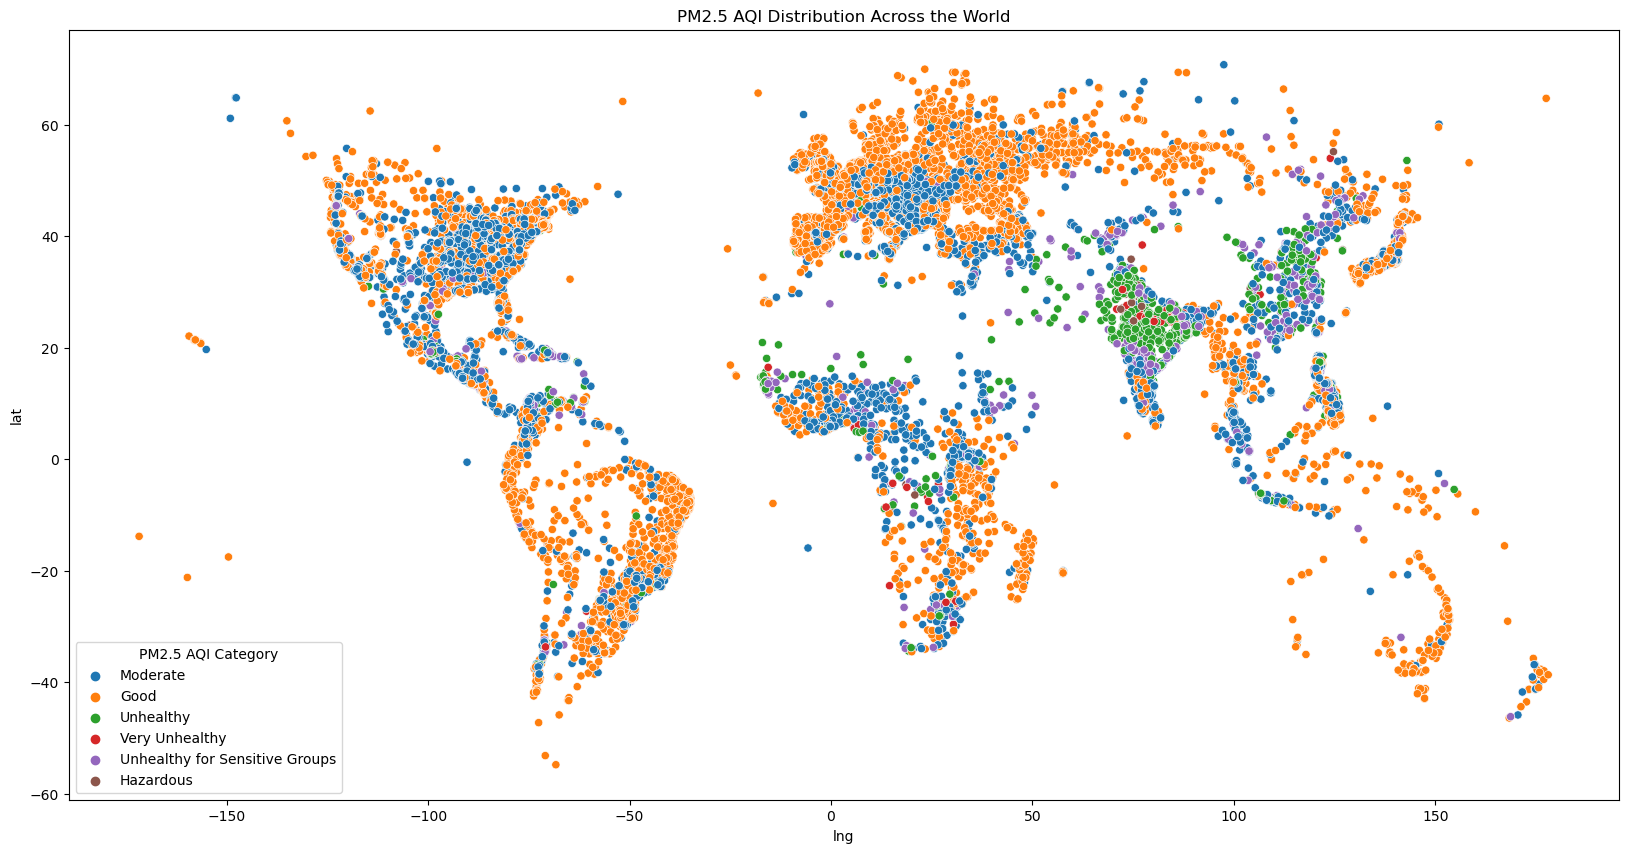

In [19]:
# region wise PM2.5 distribution
plt.figure(figsize=(20,10))
sns.scatterplot(data=aqi_df,x='lng',y='lat',hue='PM2.5 AQI Category')
plt.title('PM2.5 AQI Distribution Across the World')
plt.show()

We can observe a considerable number of cities with AQI rates categorized as "Unhealthy" and "Unhealthy for Sensitive Groups," primarily concentrated in India and the eastern regions of China, consistent with the areas previously identified as having "Unhealthy" AQI levels.

In [20]:
most_frequent_countries = aqi_df.groupby('PM2.5 AQI Category')['Country'].agg(lambda x: x.value_counts().idxmax())
most_frequent_countries

PM2.5 AQI Category
Good                              United States of America
Hazardous                                            India
Moderate                          United States of America
Unhealthy                                            India
Unhealthy for Sensitive Groups    United States of America
Very Unhealthy                                       India
Name: Country, dtype: object

**What's interesting to see is:**
- Most frequent country with 'Good PM2.5 AQI Category' is USA. 
- Most frequent country with 'Hazardous PM2.5 AQI Category' is India.
- Most frequent country with 'moderate PM2.5 AQI Category' is USA. 
- Most frequent country with 'unhealthy PM2.5 AQI Category' is India. 
- Most frequent country with 'unhealthy for sensitive groups PM2.5 AQI Category' is USA. 
- Most frequent coutry with 'very unhealthy PM2.5 AQI Category' is India. 

# 2)

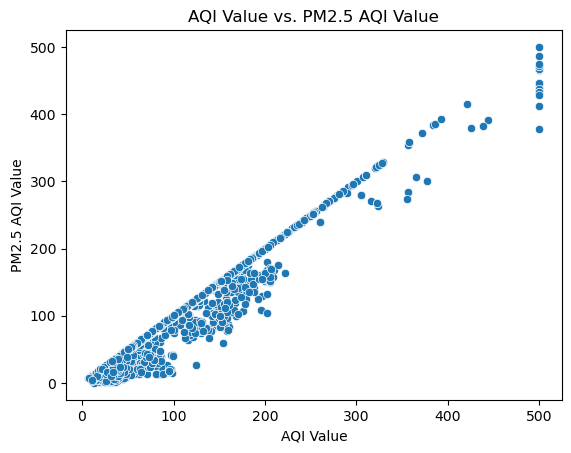

0.98


In [21]:
sns.scatterplot(data=aqi_df, x='AQI Value', y='PM2.5 AQI Value')
plt.title('AQI Value vs. PM2.5 AQI Value')
plt.xlabel('AQI Value')
plt.ylabel('PM2.5 AQI Value')
plt.show()

correlation_coefficient = aqi_df['AQI Value'].corr(aqi_df['PM2.5 AQI Value'])
print(f"{correlation_coefficient:.2f}")

The correlation between 'AQI Value' and 'PM2.5 AQI Value' is 0.98. This correlation suggests a very strong and positive linear relationship between the two variables, which means, the two variables are highly correlated, and changes in one variable can be used to predict changes in the other variable with high confidence.

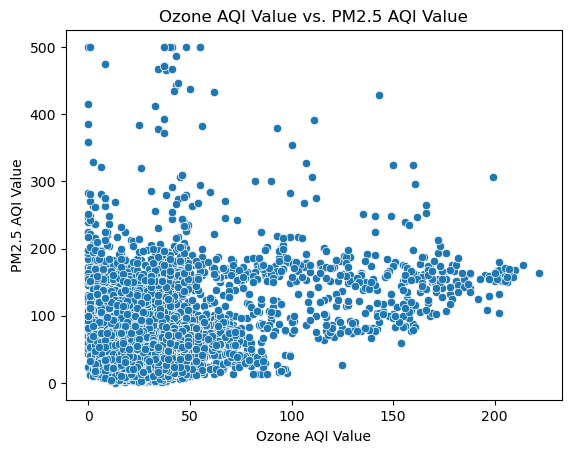

0.23


In [22]:
sns.scatterplot(data=aqi_df, x='Ozone AQI Value', y='PM2.5 AQI Value')
plt.title('Ozone AQI Value vs. PM2.5 AQI Value')
plt.xlabel('Ozone AQI Value')
plt.ylabel('PM2.5 AQI Value')
plt.show()

correlation_coefficient = aqi_df['Ozone AQI Value'].corr(aqi_df['PM2.5 AQI Value'])
print(f"{correlation_coefficient:.2f}")

The correlation between 'Ozone AQI Value' and 'PM2.5 AQI Value' is 0.23. This correlation suggests that there is a mild positive relationship between the two variables, but it is not strong enough to make precise predictions based solely on their linear association. 

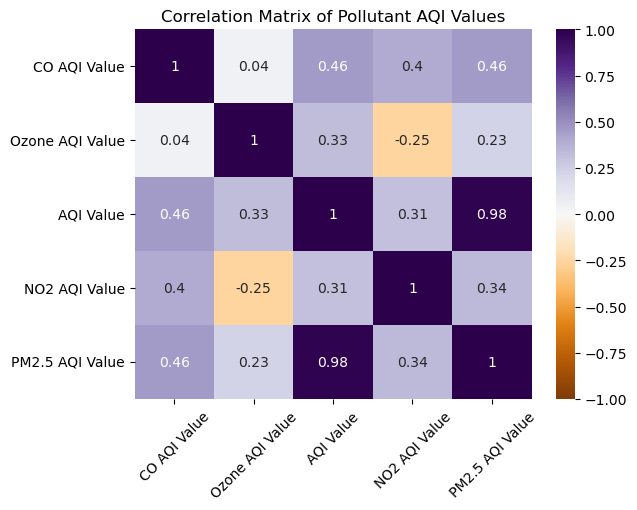

In [23]:
corr_matrix = aqi_df[['CO AQI Value', 'Ozone AQI Value','AQI Value', 'NO2 AQI Value', 'PM2.5 AQI Value']].corr()

sns.heatmap(corr_matrix, annot=True, cmap='PuOr', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Pollutant AQI Values')
plt.xticks(rotation = 45)
plt.show()

In [24]:
corr_matrix

,CO AQI Value,Ozone AQI Value,AQI Value,NO2 AQI Value,PM2.5 AQI Value
CO AQI Value,1.000000,0.039752,0.458523,0.399566,0.458846
Ozone AQI Value,0.039752,1.000000,0.327956,-0.251169,0.233031
AQI Value,0.458523,0.327956,1.000000,0.308858,0.980360
NO2 AQI Value,0.399566,-0.251169,0.308858,1.000000,0.341455
PM2.5 AQI Value,0.458846,0.233031,0.980360,0.341455,1.000000


Given the high correlation coefficient of 0.98 between AQI values and PM2.5 values, we can further reinforce our earlier observation that areas in India and the eastern parts of China, predominantly labeled as "Unhealthy" in AQI categories, exhibit closely aligned elevated PM2.5 concentrations.

# PART 3: Estimation and hypothesis testing

# 1)

### Is there a diffrence in AQI values between Eastern Hemisphere and Western Hemisphere?

We want to see which part of the globe has better air quality. This is why we will divide the globe into two parts along the Prime Meridian (Greenwich). In the Eastern Hemisphere, we will have Asia and most of Europe and Africa, along with parts of eastern Oceania. In the Western Hemisphere, we will have North and South America and part of Oceania. The Eastern Hemisphere has some of the world's major economic powerhouses, including China, Japan, India and Germany. On the other hand, the 'New World' (the Western Hemisphere) includes the Americas, which are known for being rich in diverse ecosystems. We want to see if the differences between the two Hemispheres can correlate with differences in AQI values there.

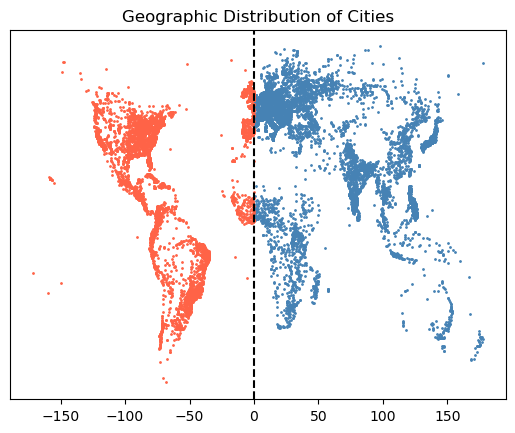

In [25]:
#Deviding to Eastern and Western Hemispheres
filtered_data_lng_gt_0 = aqi_df[aqi_df['lng'] > 0]
filtered_data_lng_lt_0 = aqi_df[aqi_df['lng'] <= 0]

plt.scatter(filtered_data_lng_gt_0['lng'], filtered_data_lng_gt_0['lat'], alpha=1, s=1, c='steelblue')
plt.scatter(filtered_data_lng_lt_0['lng'], filtered_data_lng_lt_0['lat'], alpha=1, s=1, c='tomato')
plt.axvline(x=0, color='black', linestyle='--')

plt.title('Geographic Distribution of Cities')
plt.yticks([])
plt.show()

# 2)

$H_{0}$: There is no difference in mean AQI values between the Eastern and Western Hemispheres. <br>
$H_{1}$: There is difference in mean AQI values between the Eastern and Western Hemispheres.

The p-value is 0.10633333333333334


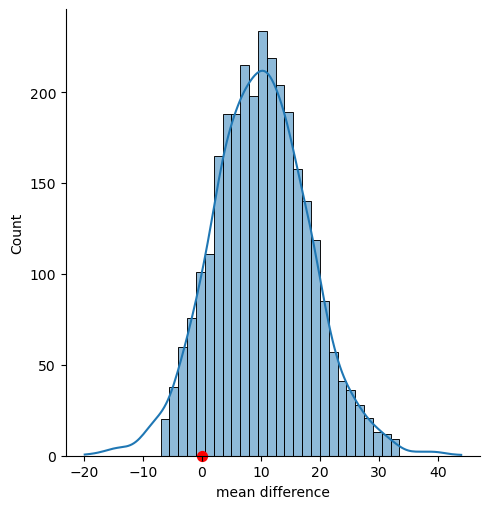

In [26]:
# value from one sample
def random_sample_mean(n):
    sample_df = aqi_df.sample(n)
    return sample_df

# calculate the difference
def calculate_diff(sample_df):
    mean_gt_0 = sample_df[sample_df['lng'] > 0]['AQI Value'].mean()
    mean_lt_0 = sample_df[sample_df['lng'] <= 0]['AQI Value'].mean()
    return mean_gt_0 - mean_lt_0
    
    
# run many simulations
num_sims = 3000 # the number of simulations we run
mean_diff = []
sample_size = 100 

for i in range(num_sims):
    mean_diff.append(calculate_diff(random_sample_mean(sample_size)))
    
ax = sns.displot(mean_diff, bins=np.arange(-7,35,1.5), kde=True)
plt.scatter(0, 0, marker='.', s=200, color='red', clip_on=False) 
ax.set(xlabel='mean difference')

In [34]:
np_mean_diff = np.array(mean_diff)
count_0_or_fewer = np.count_nonzero(np_mean_diff <= 0)
print ('The p-value is', count_0_or_fewer/len(np_mean_diff))

The p-value is 0.10633333333333334


We got a p-value of 0.106, that is greater that 0.05, which suggest that we cannot regect the $H_{0}$. 

# PART 4: Prediction/Clustering

# 1)
We want to group data into clusters to see if there's a connection between a country's GDP and its AQI level. The potential benefit of this clustering is to find out what kinds of countries, with similar GDPs, share common characteristics. This could help us understand how GDP and AQI are related and how they differ among different groups of countries. 

To do so, we will need outer data of GDP per country. We will use the data set: https://www.kaggle.com/datasets/fernandol/countries-of-the-world . 
This dataset provides essential information on countries, including GDP, population, region, area size, and infant mortality, etc. The dataset's source is the US government and the World Factbook data.

We will combine both datasets into a single dataset to utilize for clustering purposes.

# 2) 
The variables we used for clustering:
- AQI Value: We chose this becaue we want to see what is in common for the contries that have the same air quality.
- GDP ($ per capita): we chose this because we want to see how the AQI affects the GDP per capita in the countries that have the same air quality

# 3)

In [28]:
# Calculate the average AQI value for each country
country_avg_aqi = aqi_df.groupby('Country')['AQI Value'].mean().reset_index()

# Display the top polluted countries
display(country_avg_aqi.head(10))

,Country,AQI Value
0,Afghanistan,86.333333
1,Albania,77.111111
2,Algeria,106.250000
3,Andorra,32.000000
4,Angola,85.000000
5,Argentina,29.444444
6,Armenia,51.800000
7,Aruba,163.000000
8,Australia,34.000000
9,Austria,52.708333


Please note that there are 302 cities lacking the 'Country' label, and these will not be taken into consideration within our clustering process. Given that the dataset contains approximately 16,000 cities, the impact of not including these 302 cities in our analysis is likely to be minimal, considering the larger dataset size. Prioritizing the accuracy and completeness of our analysis, it's reasonable to exclude incomplete data points.

In [29]:
countries_df = pd.read_csv('countries of the world.csv')  

# Clean and standardize the country names in country_avg_aqi
country_avg_aqi['Country'] = country_avg_aqi['Country'].str.strip().str.lower()

# Clean and standardize the country names in countries_df
countries_df['Country'] = countries_df['Country'].str.strip().str.lower()

# Merge the DataFrames based on the 'country' column
merged_df = country_avg_aqi.merge(countries_df, on='Country', how='left')

merged_df.to_csv('Merged_AQI_Countries1.csv', index=False)

display(merged_df.head())
display(merged_df.describe())
display(merged_df.describe(include=['O']))
merged_df.info()

,Country,AQI Value,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),...,Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,afghanistan,86.333333,ASIA (EX. NEAR EAST),31056997.0,647500.0,"48,0","0,00","23,06","163,07",700.0,...,"3,2","12,13","0,22","87,65",1,"46,6","20,34","0,38","0,24","0,38"
1,albania,77.111111,EASTERN EUROPE,3581655.0,28748.0,"124,6","1,26","-4,93","21,52",4500.0,...,"71,2","21,09","4,42","74,49",3,"15,11","5,22","0,232","0,188","0,579"
2,algeria,106.250000,NORTHERN AFRICA,32930091.0,2381740.0,"13,8","0,04","-0,39",31,6000.0,...,"78,1","3,22","0,25","96,53",1,"17,14","4,61","0,101","0,6","0,298"
3,andorra,32.000000,WESTERN EUROPE,71201.0,468.0,"152,1","0,00","6,6","4,05",19000.0,...,"497,2","2,22",0,"97,78",3,"8,71","6,25",NaN,NaN,NaN
4,angola,85.000000,SUB-SAHARAN AFRICA,12127071.0,1246700.0,"9,7","0,13",0,"191,19",1900.0,...,"7,8","2,41","0,24","97,35",NaN,"45,11","24,2","0,096","0,658","0,246"


,AQI Value,Population,Area (sq. mi.),GDP ($ per capita)
count,174.000000,1.460000e+02,1.460000e+02,146.000000
mean,71.811386,3.761306e+07,6.575823e+05,9445.890411
std,44.729408,1.434607e+08,1.533188e+06,10242.596160
min,16.000000,2.057900e+04,2.000000e+00,500.000000
25%,44.192967,3.121019e+06,4.566950e+04,1900.000000
50%,60.820341,8.250692e+06,1.699150e+05,5050.000000
75%,86.494624,2.238307e+07,5.737450e+05,13025.000000
max,421.000000,1.313974e+09,9.984670e+06,55100.000000


,Country,Region,Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
count,174,146,146,146,146,146,144,145,146,146,146,132,145,145,145,144,144
unique,174,11,140,92,101,145,106,141,140,117,143,6,144,137,115,115,121
top,afghanistan,SUB-SAHARAN AFRICA,"77,4","0,00",0,"9,95","99,0","2,7",0,0,"70,44",2,"20,48","9,42","0,04","0,203","0,684"
freq,1,38,2,33,41,2,9,2,2,8,2,59,2,2,4,3,3


<class 'pandas.core.frame.DataFrame'>
Int64Index: 174 entries, 0 to 173
Data columns (total 21 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Country                             174 non-null    object 
 1   AQI Value                           174 non-null    float64
 2   Region                              146 non-null    object 
 3   Population                          146 non-null    float64
 4   Area (sq. mi.)                      146 non-null    float64
 5   Pop. Density (per sq. mi.)          146 non-null    object 
 6   Coastline (coast/area ratio)        146 non-null    object 
 7   Net migration                       146 non-null    object 
 8   Infant mortality (per 1000 births)  146 non-null    object 
 9   GDP ($ per capita)                  146 non-null    float64
 10  Literacy (%)                        144 non-null    object 
 11  Phones (per 1000)                   145 non-n

In [30]:
complete_countries_df = pd.read_csv('Merged_AQI_Countries.csv')  

display(complete_countries_df.head())

# Remove rows containing NaN values
complete_countries_df.dropna(inplace=True)

# Display the contents of the DataFrame after removing NaN rows
display(complete_countries_df.head())

# Display summary statistics of numerical columns
display(complete_countries_df.describe())

# Display summary statistics of categorical (object) columns
display(complete_countries_df.describe(include=['O']))

# Display information about the DataFrame (column data types, non-null counts, etc.)
complete_countries_df.info()

,Country,AQI Value,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),...,Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,afghanistan,86.333333,ASIA (EX. NEAR EAST),31056997.0,647500.0,"48,0","0,00","23,06","163,07",700.0,...,"3,2","12,13","0,22","87,65",1,"46,6","20,34","0,38","0,24","0,38"
1,albania,77.111111,EASTERN EUROPE,3581655.0,28748.0,"124,6","1,26","-4,93","21,52",4500.0,...,"71,2","21,09","4,42","74,49",3,"15,11","5,22","0,232","0,188","0,579"
2,algeria,106.250000,NORTHERN AFRICA,32930091.0,2381740.0,"13,8","0,04","-0,39",31,6000.0,...,"78,1","3,22","0,25","96,53",1,"17,14","4,61","0,101","0,6","0,298"
3,andorra,32.000000,WESTERN EUROPE,71201.0,468.0,"152,1","0,00","6,6","4,05",19000.0,...,"497,2","2,22",0,"97,78",3,"8,71","6,25",NaN,NaN,NaN
4,angola,85.000000,SUB-SAHARAN AFRICA,12127071.0,1246700.0,"9,7","0,13",0,"191,19",1900.0,...,"7,8","2,41","0,24","97,35",NaN,"45,11","24,2","0,096","0,658","0,246"


,Country,AQI Value,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),...,Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,afghanistan,86.333333,ASIA (EX. NEAR EAST),31056997.0,647500.0,"48,0","0,00","23,06","163,07",700.0,...,"3,2","12,13","0,22","87,65",1,"46,6","20,34","0,38","0,24","0,38"
1,albania,77.111111,EASTERN EUROPE,3581655.0,28748.0,"124,6","1,26","-4,93","21,52",4500.0,...,"71,2","21,09","4,42","74,49",3,"15,11","5,22","0,232","0,188","0,579"
2,algeria,106.250000,NORTHERN AFRICA,32930091.0,2381740.0,"13,8","0,04","-0,39",31,6000.0,...,"78,1","3,22","0,25","96,53",1,"17,14","4,61","0,101","0,6","0,298"
5,argentina,29.444444,LATIN AMER. & CARIB,39921833.0,2766890.0,"14,4","0,18","0,61","15,18",11200.0,...,"220,4","12,31","0,48","87,21",3,"16,73","7,55","0,095","0,358","0,547"
6,armenia,51.800000,C.W. OF IND. STATES,2976372.0,29800.0,"99,9","0,00","-6,47","23,28",3500.0,...,"195,7","17,55","2,3","80,15",4,"12,07","8,23","0,239","0,343","0,418"


,AQI Value,Population,Area (sq. mi.),GDP ($ per capita)
count,148.000000,1.480000e+02,1.480000e+02,148.000000
mean,74.379050,4.095139e+07,6.797544e+05,8517.567568
std,47.355414,1.440568e+08,1.510244e+06,9504.919716
min,16.000000,2.057900e+04,1.930000e+02,500.000000
25%,43.868766,3.371779e+06,5.536375e+04,1700.000000
50%,61.652174,9.100290e+06,2.137150e+05,4650.000000
75%,91.875000,2.684247e+07,6.085210e+05,11125.000000
max,421.000000,1.313974e+09,9.631420e+06,37800.000000


,Country,Region,Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
count,148,148,148,148,148,148,148,148,148,148,148,148,148,148,148,148,148
unique,148,11,142,91,103,147,112,142,144,117,147,6,146,140,120,119,126
top,afghanistan,SUB-SAHARAN AFRICA,"77,4","0,00",0,"9,95","99,0","2,7","1,64",0,"70,44",2,"18,02","9,42","0,04","0,203","0,46"
freq,1,44,2,34,42,2,9,2,2,6,2,69,2,2,5,3,3


<class 'pandas.core.frame.DataFrame'>
Int64Index: 148 entries, 0 to 173
Data columns (total 21 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Country                             148 non-null    object 
 1   AQI Value                           148 non-null    float64
 2   Region                              148 non-null    object 
 3   Population                          148 non-null    float64
 4   Area (sq. mi.)                      148 non-null    float64
 5   Pop. Density (per sq. mi.)          148 non-null    object 
 6   Coastline (coast/area ratio)        148 non-null    object 
 7   Net migration                       148 non-null    object 
 8   Infant mortality (per 1000 births)  148 non-null    object 
 9   GDP ($ per capita)                  148 non-null    float64
 10  Literacy (%)                        148 non-null    object 
 11  Phones (per 1000)                   148 non-n

In [31]:
from sklearn.preprocessing import MinMaxScaler

df_km = complete_countries_df[['AQI Value', 'GDP ($ per capita)']]
df_km.head()

df_columns = df_km.columns
scaler = MinMaxScaler()
scaled_np_matrix = scaler.fit_transform(df_km)

km_scaled_df = pd.DataFrame(scaled_np_matrix, columns=df_columns)
km_scaled_df.head(20)

,AQI Value,GDP ($ per capita)
0,0.173663,0.005362
1,0.150892,0.107239
2,0.222840,0.147453
3,0.033196,0.286863
4,0.088395,0.080429
5,0.362963,0.737265
6,0.044444,0.764075
7,0.090638,0.790885
8,0.111863,0.077748
9,0.424691,0.439678


Please note that differences in country names between both datasets are leading to null or NaN values after the merge. Due to slight variations in the names across the DataFrames, a small portion of the merged data required manual completion.

/Users/ofek/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/ofek/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/ofek/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/ofek/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/ofek/

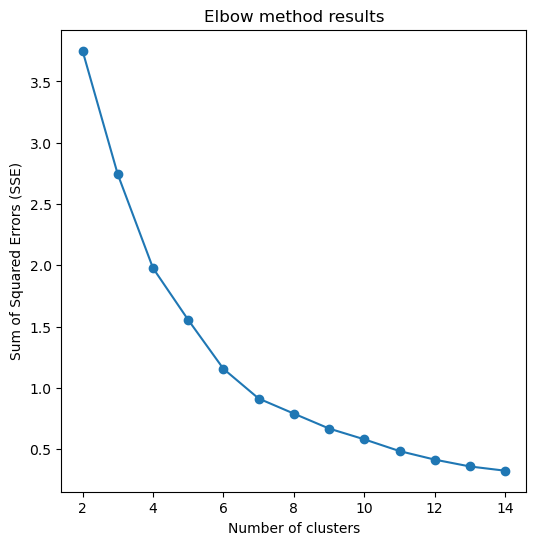

In [32]:
from sklearn.cluster import KMeans

sse = []
for k in range(2, 15):
    km = KMeans(n_clusters=k) # Initialize K-Means model with k centroids
    km.fit(km_scaled_df) # Run algorithm and create clusters
    sse.append(km.inertia_) # SSE calculated is provided in the KMeans object, it calculates SSE automatically, 
                            # and given in the inertia_ attribute    
plt.figure(figsize=(6,6))
plt.plot(range(2, 15), sse, '-o')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.title('Elbow method results');

We chose k = 7.

/Users/ofek/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


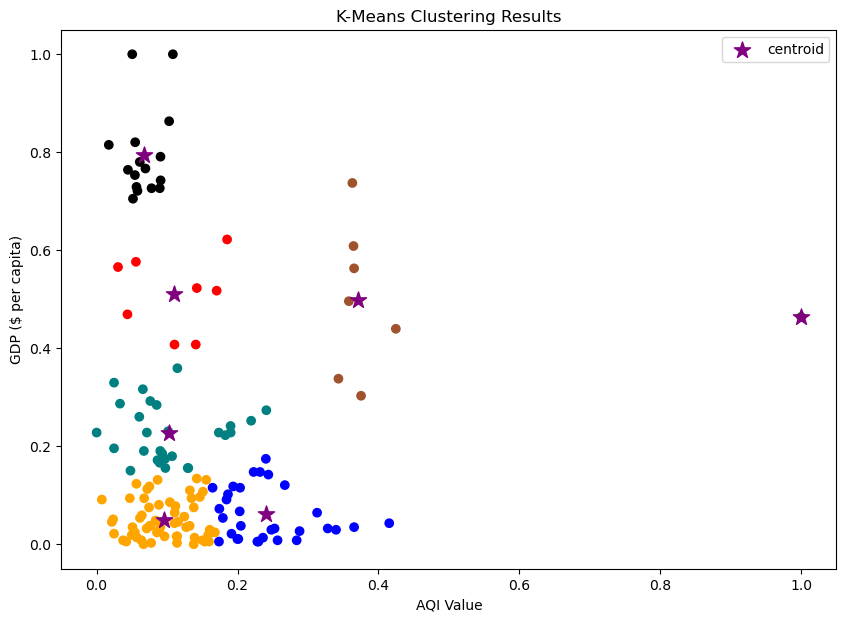

In [33]:
km = KMeans(n_clusters=7)
km.fit(km_scaled_df)
km.cluster_centers_
km.labels_

colors = np.array(['red', 'blue', 'orange', 'black', 'teal', 'green', 'sienna'])

# Technical change to match the colors below for n_clusters=7
map_dict = {0: 2, 1: 0, 2: 1, 3: 4, 4: 5, 5: 3, 6: 6}
labels = np.array([map_dict[l] for l in km.labels_])

plt.figure(figsize=(10, 7))
plt.scatter(km_scaled_df['AQI Value'], km_scaled_df['GDP ($ per capita)'], c=colors[labels])
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], color='purple', marker='*', s=150, label='centroid')
plt.xlabel('AQI Value')
plt.ylabel('GDP ($ per capita)')
plt.title('K-Means Clustering Results')
plt.legend()
plt.show()

The clustering analysis has shown that countries with very high GDP tend to have small air pollution levels and countries with very low GDP also have relatively small air pollution levels, it suggests the presence of a negative correlation between GDP and air pollution.

This observation aligns with the Environmental Kuznets Curve (EKC) hypothesis, which postulates an inverted U-shaped relationship between economic development (usually measured by GDP per capita) and environmental degradation (such as air pollution). The EKC hypothesis suggests that at the early stages of economic development, pollution levels tend to rise as industries and economic activities intensify, leading to increased pollution. However, as countries reach a certain level of economic development, environmental concerns become more pronounced, leading to the implementation of stricter environmental regulations and cleaner technologies. This can result in a decrease in pollution levels despite continued economic growth.

The observation we have made through clustering is consistent with this hypothesis and implies that some countries with higher GDP might have reached a stage where they are actively addressing environmental issues and adopting cleaner practices, resulting in lower air pollution levels. Similarly, some low GDP countries might have lower levels of industrialization and economic activities, leading to relatively low pollution levels.